# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
#change the city everytime        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | frenda
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | touba
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | sakakah
Processing Record 14 of Set 1 | san ignacio de velasco
Processing Record 15 of Set 1 | guiratinga
Processing Record 16 of Set 1 | new plymouth
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | waiuku
Processing Record 19 of Set 1 | karachi
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22

Processing Record 41 of Set 4 | ujae
Processing Record 42 of Set 4 | cooma
Processing Record 43 of Set 4 | praia da vitoria
Processing Record 44 of Set 4 | geraldton
Processing Record 45 of Set 4 | tosontsengel
Processing Record 46 of Set 4 | nadym
Processing Record 47 of Set 4 | malabrigo
Processing Record 48 of Set 4 | alotau
City not found. Skipping...
Processing Record 49 of Set 4 | tanjung pandan
Processing Record 0 of Set 5 | bamboo flat
Processing Record 1 of Set 5 | kununurra
Processing Record 2 of Set 5 | posto fiscal rolim de moura
Processing Record 3 of Set 5 | ziro
Processing Record 4 of Set 5 | daru
Processing Record 5 of Set 5 | kupang
Processing Record 6 of Set 5 | aasiaat
Processing Record 7 of Set 5 | dzialdowo
Processing Record 8 of Set 5 | jining
Processing Record 9 of Set 5 | ostrow mazowiecka
Processing Record 10 of Set 5 | sitampiky
City not found. Skipping...
Processing Record 11 of Set 5 | pangai
Processing Record 12 of Set 5 | zhezqazghan
Processing Record 13 o

Processing Record 33 of Set 8 | zuwarah
Processing Record 34 of Set 8 | mejit
Processing Record 35 of Set 8 | gorontalo
Processing Record 36 of Set 8 | ta`u
Processing Record 37 of Set 8 | nema
Processing Record 38 of Set 8 | lihue
Processing Record 39 of Set 8 | suntar
Processing Record 40 of Set 8 | campo formoso
Processing Record 41 of Set 8 | sirsa
Processing Record 42 of Set 8 | fukuecho
Processing Record 43 of Set 8 | fale old settlement
Processing Record 44 of Set 8 | luderitz
Processing Record 45 of Set 8 | gounou gaya
Processing Record 46 of Set 8 | hammerfest
Processing Record 47 of Set 8 | zeya
Processing Record 48 of Set 8 | meulaboh
Processing Record 49 of Set 8 | mountain home
Processing Record 0 of Set 9 | kalmunai
Processing Record 1 of Set 9 | colonia
Processing Record 2 of Set 9 | vicuna
Processing Record 3 of Set 9 | shiqian
Processing Record 4 of Set 9 | zarand
Processing Record 5 of Set 9 | bignona
Processing Record 6 of Set 9 | mayen abun
City not found. Skipping.

Processing Record 28 of Set 12 | tidjikja
Processing Record 29 of Set 12 | san fernando del valle de catamarca
Processing Record 30 of Set 12 | gaalkacyo
Processing Record 31 of Set 12 | valparaiso
Processing Record 32 of Set 12 | mawu
Processing Record 33 of Set 12 | puerto maldonado
Processing Record 34 of Set 12 | bicske
Processing Record 35 of Set 12 | khovd
Processing Record 36 of Set 12 | tambovka
Processing Record 37 of Set 12 | parkes
Processing Record 38 of Set 12 | chernyshevskiy
Processing Record 39 of Set 12 | aras-asan
Processing Record 40 of Set 12 | fisterra
Processing Record 41 of Set 12 | bridgewater
Processing Record 42 of Set 12 | bulgan
Processing Record 43 of Set 12 | fairbanks
Processing Record 44 of Set 12 | port augusta
Processing Record 45 of Set 12 | beltran
Processing Record 46 of Set 12 | thames
Processing Record 47 of Set 12 | roosevelt
Processing Record 48 of Set 12 | woodland park
Processing Record 49 of Set 12 | batu feringgi
City not found. Skipping...


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,281.58,89,75,5.66,CA,1697679176
1,frenda,35.0654,1.0495,289.55,77,39,1.70,DZ,1697679696
2,qaqortoq,60.7167,-46.0333,271.76,58,52,2.12,GL,1697679199
3,papatowai,-46.5619,169.4708,290.03,49,77,6.34,NZ,1697679171
4,hermanus,-34.4187,19.2345,289.33,85,37,7.90,ZA,1697679169


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("World_Weather_Analysis.csv")

In [7]:
# Read saved data
city_data_df = pd.read_csv("World_Weather_Analysis.csv", index_col="City")

# Display sample data
city_data_df.head()

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
whitehorse,0,60.7161,-135.0538,281.58,89,75,5.66,CA,1697679176
frenda,1,35.0654,1.0495,289.55,77,39,1.70,DZ,1697679696
qaqortoq,2,60.7167,-46.0333,271.76,58,52,2.12,GL,1697679199
papatowai,3,-46.5619,169.4708,290.03,49,77,6.34,NZ,1697679171
hermanus,4,-34.4187,19.2345,289.33,85,37,7.90,ZA,1697679169


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

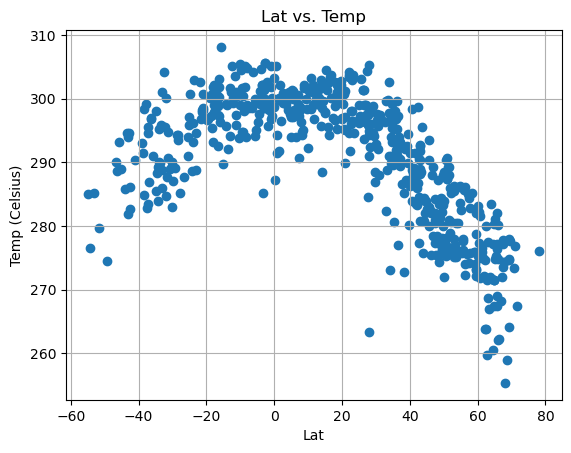

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
# Incorporate the other graph properties
plt.title("Lat vs. Temp")
plt.ylabel("Temp (Celsius)")
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()



#### Latitude Vs. Humidity

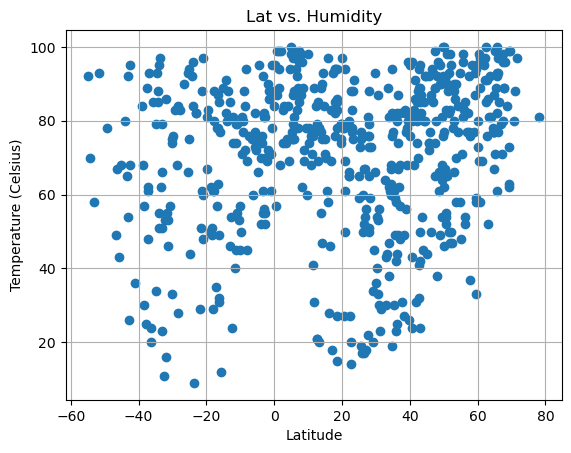

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Lat vs. Humidity" )
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

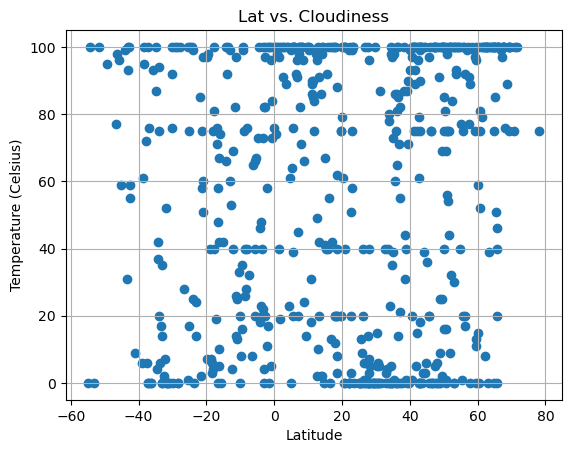

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Lat vs. Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

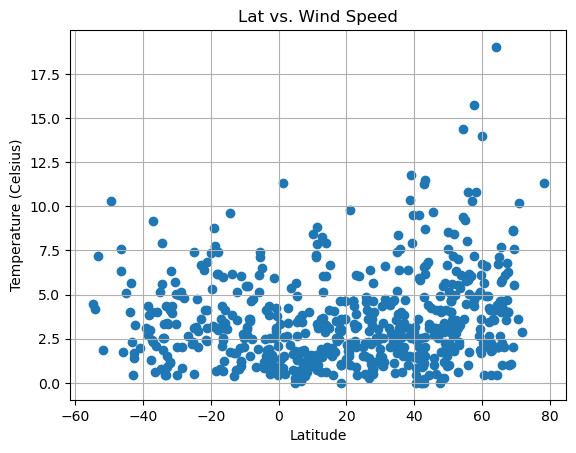

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")


# Incorporate the other graph properties
plt.title("Lat vs. Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(line_eq,text_coordinates)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


 





In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

northern_hemi_df.head()



,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
whitehorse,0,60.7161,-135.0538,281.58,89,75,5.66,CA,1697679176
frenda,1,35.0654,1.0495,289.55,77,39,1.70,DZ,1697679696
qaqortoq,2,60.7167,-46.0333,271.76,58,52,2.12,GL,1697679199
iqaluit,5,63.7506,-68.5145,272.00,92,100,4.12,CA,1697679162
yellowknife,7,62.4560,-114.3525,280.05,100,100,4.12,CA,1697678982


In [14]:
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0]

southern_hemi_df.head()


,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
papatowai,3,-46.5619,169.4708,290.03,49,77,6.34,NZ,1697679171
hermanus,4,-34.4187,19.2345,289.33,85,37,7.90,ZA,1697679169
port-aux-francais,6,-49.3500,70.2167,274.47,78,95,10.33,TF,1697679164
adamstown,10,-25.0660,-130.1015,295.82,75,17,0.50,PN,1697679164
san ignacio de velasco,12,-16.3667,-60.9500,300.30,49,42,0.69,BO,1697679698


###  Temperature vs. Latitude Linear Regression Plot

y = -0.47x + 305.78 (50, 50)
The r-value is: 0.7143479444581443


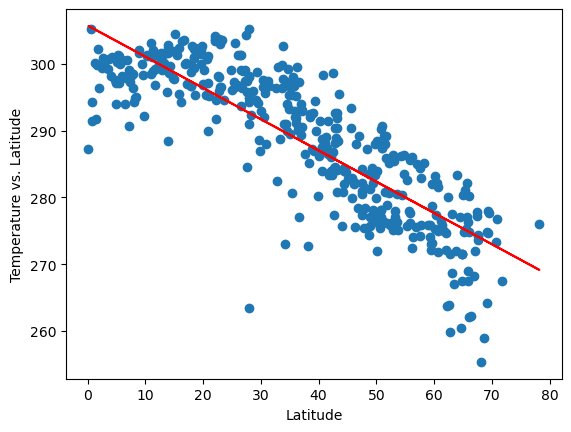

In [15]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values,"Temperature vs. Latitude", (50,50))


y = 0.31x + 302.15 (50, 50)
The r-value is: 0.4818202005162224


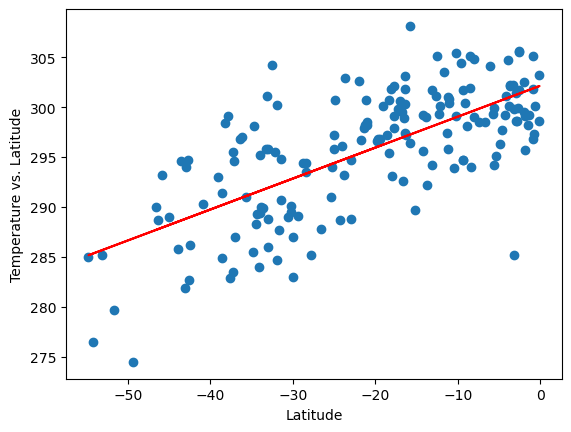

In [16]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values,"Temperature vs. Latitude", (50,50))

**Discussion about the linear relationship:** from what I can see -- the 

### Humidity vs. Latitude Linear Regression Plot

y = 0.13x + 67.36 (50, 50)
The r-value is: 0.01451754537605267


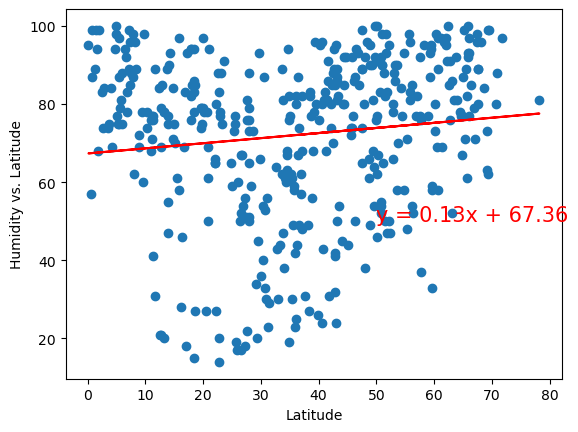

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values,"Humidity vs. Latitude", (50,50))

y = 0.22x + 71.36 (50, 50)
The r-value is: 0.02215777699821337


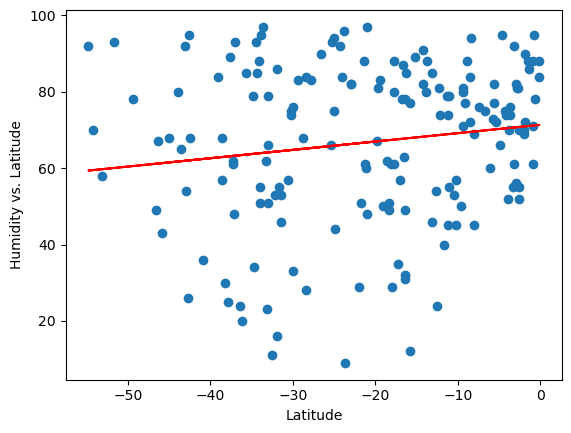

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values,"Humidity vs. Latitude", (50,50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.21x + 50.76 (50, 50)
The r-value is: 0.009352577929972149


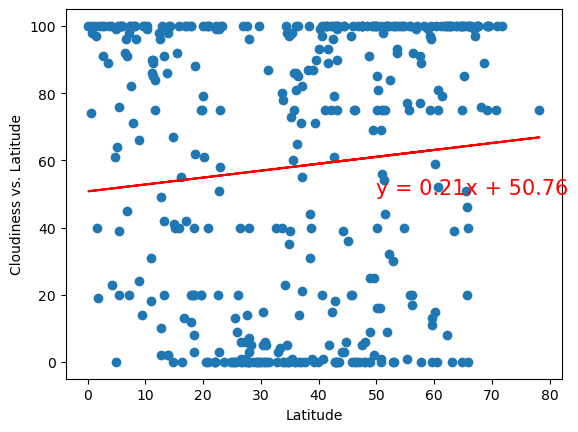

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values,"Cloudiness vs. Latitude", (50,50))

y = -0.0x + 49.82 (50, 50)
The r-value is: 2.6763423943029125e-07


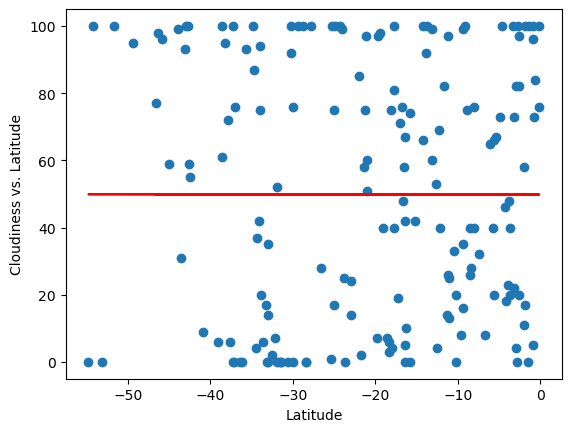

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values,"Cloudiness vs. Latitude", (50,50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.04x + 2.15 (50, 50)
The r-value is: 0.0786237188696516


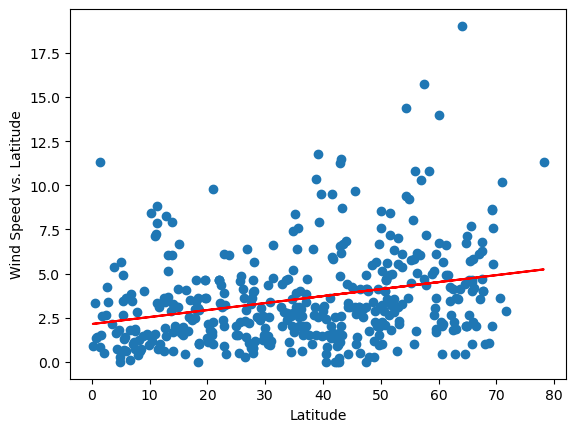

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values,"Wind Speed vs. Latitude", (50,50))

y = -0.02x + 2.84 (50, 50)
The r-value is: 0.026868459017544193


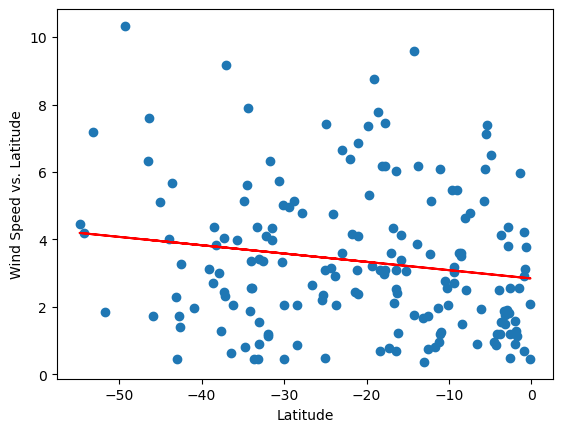

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values,"Wind Speed vs. Latitude", (50,50))

In [23]:
#After each pair of plots, explain what the linear regression is modeling. Describe any relationships that you notice and any other findings you may uncover.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [24]:
#After each pair of plots, explain what the linear regression is modeling. Describe any relationships that you notice and any other findings you may uncover.
#Cloudiness and lat -- are pretty close in by hemi's
#in southern and northern hemi -- the outcome came out almost as complete opposites in temp -- which I suppose isn't surprising
#the winds seem stronger in the south
#it is more cloudy in the north

# a very interesting layout of the different weather patterns -- it does give way to north and south weather trends and I think it's important to continue these study's to see how the weather changes over time
